In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [23]:
data = pd.read_csv("dataset_1.csv")

In [24]:
data

,Unnamed: 0,normalized_age,normalized_salary
0,0,0.680267,-0.016342
1,1,3.809518,0.798483
2,2,-1.661372,-0.577667
3,3,-0.257307,-0.155552
4,4,0.698017,0.174561
...,...,...,...
995,995,-5.060165,2.482045
996,996,-5.079404,2.773580
997,997,-5.861520,3.068426
998,998,-5.018934,3.110904


In [25]:
data = data.drop(["Unnamed: 0"], axis=1)
sc = StandardScaler()
X_sc = sc.fit_transform(data)

In [26]:
m = X_sc.shape[0]
n = X_sc.shape[1]

Etape 1 : on place 2 centroids au hasard dans le dataset

In [27]:
Centroids=np.array([]).reshape(n,0) 
# les centroîdes sont une matrice  de n lignes. 

In [28]:
Centroids.shape

(2, 0)

In [29]:
# on place un centroîde dans chaque colonne
import random
K=2
for i in range(K):
    rand=random.randint(0,m-1)
    Centroids=np.c_[Centroids, X_sc[rand]]

In [31]:
Centroids.shape

(2, 2)

Etape 2 : la distance eucliedienne 
Puis chaque point du dataset est affecté au cluster du centroide le plus proche, ie la position des centroîdes qui minimise la distance entre les points(x) et le centre(moyenne). cela equivaut à minimiser la variances des clusters.

In [32]:
Output={}

EuclidianDistance=np.array([]).reshape(m,0)
for k in range(K):
    tempDist=np.sum((X_sc-Centroids[:,k])**2,axis=1)
    EuclidianDistance=np.c_[EuclidianDistance,tempDist]
C=np.argmin(EuclidianDistance,axis=1)+1

calculer la moyenne de tous les clusters individuels et déplacer le centre de gravité vers la moyenne calculée.

In [33]:
Y={}
for k in range(K):
    Y[k+1]=np.array([]).reshape(2,0)
for i in range(m):
    Y[C[i]]=np.c_[Y[C[i]],X_sc[i]]
     
for k in range(K):
    Y[k+1]=Y[k+1].T
    
for k in range(K):
     Centroids[:,k]=np.mean(Y[k+1],axis=0)

Répétons l'etape jusuqu'à ce que la convergence soit atteinte

In [36]:
n_iter=100
for i in range(n_iter):
    
    EuclidianDistance=np.array([]).reshape(m,0)
    for k in range(K):
        tempDist=np.sum((X_sc-Centroids[:,k])**2,axis=1)
        EuclidianDistance=np.c_[EuclidianDistance,tempDist]
    C=np.argmin(EuclidianDistance,axis=1)+1
     #step 2.b
    Y={}
    for k in range(K):
        Y[k+1]=np.array([]).reshape(2,0)
    for i in range(m):
          Y[C[i]]=np.c_[Y[C[i]],X_sc[i]]
     
    for k in range(K):
        Y[k+1]=Y[k+1].T
    
    for k in range(K):
        Centroids[:,k]=np.mean(Y[k+1],axis=0)
        Output=Y

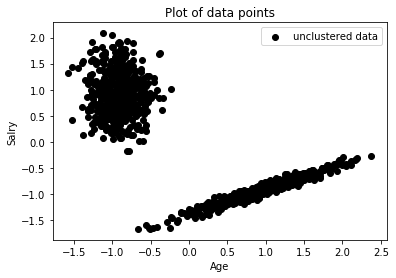

In [37]:
plt.scatter(X_sc[:,0],X_sc[:,1],c='black',label='unclustered data')
plt.xlabel('Age')
plt.ylabel('Salry')
plt.legend()
plt.title('Plot of data points')
plt.show()

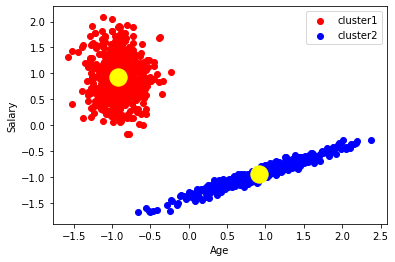

In [38]:
color=['red','blue']
labels=['cluster1','cluster2']

for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plt.scatter(Centroids[0], Centroids[1],s=300,c='yellow')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()
plt.show()